In [7]:
import sys as sys
import bluesquare_data_pipelines.access as blsq
import pandas as pd

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
hivdr = dhis.dhis_instance(dbname, user, host, psswrd)

In [18]:
hivdr.orgunitstructure[(hivdr.orgunitstructure.namelevel5_y.str.contains("Tshopo")) & ~(pd.isnull(hivdr.orgunitstructure.namelevel5_y))]

,organisationunituid,level,uidlevel1,uidlevel2,uidlevel3,uidlevel4,uidlevel5,namelevel1_x,namelevel2_x,namelevel3_x,...,uid_y,namelevel1_y,uid_x,namelevel2_y,uid_y,namelevel3_y,uid_x,namelevel4_y,uid_y,namelevel5_y
25875,Vy8dKL9RieE,5,ymGeqzoPhN3,mnOXJ2Oa5U7,IMkgSD6FVjc,lsbz7EEdNqA,Vy8dKL9RieE,République Démocratique du Congo,tp Tshopo Province,tp Tshopo Zone de Santé,...,ymGeqzoPhN3,République Démocratique du Congo,mnOXJ2Oa5U7,tp Tshopo Province,IMkgSD6FVjc,tp Tshopo Zone de Santé,lsbz7EEdNqA,tp Tshopo 1 Aire de Santé,Vy8dKL9RieE,tp Tshopo 1 Centre de Santé
25876,uenAqWpDomb,5,ymGeqzoPhN3,mnOXJ2Oa5U7,IMkgSD6FVjc,BBGKgYqChQS,uenAqWpDomb,République Démocratique du Congo,tp Tshopo Province,tp Tshopo Zone de Santé,...,ymGeqzoPhN3,République Démocratique du Congo,mnOXJ2Oa5U7,tp Tshopo Province,IMkgSD6FVjc,tp Tshopo Zone de Santé,BBGKgYqChQS,tp Tshopo 2 Aire de Santé,uenAqWpDomb,tp Tshopo 2 Centre de Santé
25877,M0PuG5D1YvY,5,ymGeqzoPhN3,mnOXJ2Oa5U7,IMkgSD6FVjc,lsbz7EEdNqA,M0PuG5D1YvY,République Démocratique du Congo,tp Tshopo Province,tp Tshopo Zone de Santé,...,ymGeqzoPhN3,République Démocratique du Congo,mnOXJ2Oa5U7,tp Tshopo Province,IMkgSD6FVjc,tp Tshopo Zone de Santé,lsbz7EEdNqA,tp Tshopo 1 Aire de Santé,M0PuG5D1YvY,tp Tshopo Hôpital Général de Référence


In [78]:
cord = cordaid_dat[(cordaid_dat.dataelementid == 'Yj8caUQs178') & (cordaid_dat.catcomboid == 't5HeKShGv9s') & 
                   (cordaid_dat.uidorgunit == 'cTR9GjE6NzM')]

In [93]:
cord = cord.sort_values('enddate')

In [249]:
cord['monthly']

4555      201701
3252      201702
3129      201704
4514      201705
1551      201707
844       201708
3051      201709
4458      201710
1415      201711
770       201712
250570    201801
248898    201802
178488    201803
244418    201807
243456    201808
240397    201809
Name: monthly, dtype: object

In [152]:
from scipy.interpolate import CubicSpline

a = CubicSpline(list(pd.to_numeric(cord['monthly'])),list(pd.to_numeric(cord['value'])), 
                extrapolate = True)

In [9]:
cordaid_dat = hivdr.get_data('Yj8caUQs178')
pnls_dat = hivdr.get_data('Dd2G5zI0o0a')

In [235]:
dat_rec = {'cordaid':cordaid_dat.loc[(cordaid_dat.uidorgunit == 'A15B3dJOSUX') & 
                                     (cordaid_dat.catcomboid == 't5HeKShGv9s'), 
                                     ['monthly', 'value']], 
           'pnls':pnls_dat.loc[(pnls_dat.uidorgunit == 'A15B3dJOSUX')& 
                               (pnls_dat.catcomboid == 'f0Q7lkGly1e'), ['monthly', 'value']]}

In [420]:
a = dp.measured_serie(dat_rec, 'stock', 'cordaid')

In [421]:
a.reconcile_series()

/Users/grlurton/Documents/bluesquare/data_pipelines/src/processing/data_process.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  add_dat['source'] = source


In [422]:
a.impute_missing(['2017-01', '2018-08'])

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [425]:
a.imputed_serie

,monthly,value,source,month,all_months_id,month_order
6,201701,4,cordaid,2017-jan,2017-01-01,1.0
9,201702,2,cordaid,2017-fév,2017-02-01,2.0
3,201703,2,cordaid,2017-mar,2017-03-01,3.0
11,201704,3,cordaid,2017-avr,2017-04-01,4.0
5,201705,4,cordaid,2017-mai,2017-05-01,5.0
8,201706,2,cordaid,2017-jui,2017-06-01,6.0
2,201707,2,cordaid,2017-jul,2017-07-01,7.0
10,201708,5,cordaid,2017-aoû,2017-08-01,8.0
0,201709,6,cordaid,2017-sep,2017-09-01,9.0
4,201710,8,cordaid,2017-oct,2017-10-01,10.0


In [479]:
u = a.benchmark_serie()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [480]:
u

,monthly,value,source,month,monthly_imputed,value_imputed,source_imputed,all_months_id,month_order
0,201709,6,cordaid,2017-sep,201709,6.000000,cordaid,2017-09-01,9.0
1,201711,3,cordaid,2017-nov,201711,3.000000,cordaid,2017-11-01,11.0
2,201707,2,cordaid,2017-jul,201707,2.000000,cordaid,2017-07-01,7.0
3,201703,2,cordaid,2017-mar,201703,2.000000,cordaid,2017-03-01,3.0
4,201710,8,cordaid,2017-oct,201710,8.000000,cordaid,2017-10-01,10.0
5,201705,4,cordaid,2017-mai,NaN,2.458336,imputation,2017-05-01,5.0
6,201701,4,cordaid,2017-jan,201701,4.000000,cordaid,2017-01-01,1.0
7,201712,3,cordaid,2017-déc,201712,3.000000,cordaid,2017-12-01,12.0
8,201706,2,cordaid,2017-jui,201706,2.000000,cordaid,2017-06-01,6.0
9,201702,2,cordaid,2017-fév,201702,2.000000,cordaid,2017-02-01,2.0


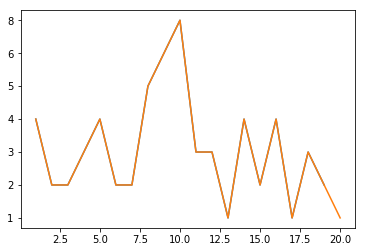

In [390]:
plt.plot(dat_fit.month_order, dat_fit.value)
plt.plot(list(range(1,21)), list(spliner_predict(list(range(1,21))).astype(int)))

In [6]:
%%R
source("/Users/grlurton/Documents/hivdr/patient_data.R")

In [91]:
%%R
library(ggplot2)
library(zoo)
library(dplyr)
library(data.table)

source("/Users/grlurton/Documents/hivdr/patient_data.R")
data_dir <- "/Users/grlurton/data/dhis/rdc/hivdr/"
metadata_dir <- "/Users/grlurton/data/dhis/rdc/hivdr/metadata/"

load_metadata(metadata_dir)

cordaid <- readRDS(paste0(data_dir, 'Cordaid_TRAITEMENTS.rds'))
cordaid <- merge(cordaid, M_org_units, by.x = 'orgUnit', by.y='id', all.y = FALSE)
pnls <- readRDS(paste0(data_dir, 'PNLS.rds'))
pnls <- merge(pnls, M_org_units, by.x = 'orgUnit', by.y='id', all.y = FALSE)

pnls_id <- 'Dd2G5zI0o0a'
cordaid_id <- 'Yj8caUQs178'

ancient_cat_option <-  c('vZ6Os4BJvum','ggod3chlUCG')
ancient_cat_combo <- M_category_combos$CatComboOpt_id[M_category_combos$CatOpt_id.1 %in% ancient_cat_option]

/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attachement du package : ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attachement du package : ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/anaconda3/lib/python3.6/site-packages/rpy2/rint

## CSV1 - Total Patients



| level_2_name  | level_2_id    | level_3_name  | level_3_id    | level_3_id   | source        |  periods      | value |
| ------------- | ------------- | ------------- | ------------- |------------- | ------------- | ------------- | ----- |


### Build the total number of patients for Cordaid

In [7]:
%%time

def get_hivdrable(de_id):
    data = hivdr.get_data(de_id)
    data = data[['dataelementid', 'monthly', 'uidorgunit', 'catcomboid', 'value']]
    data.columns = ['dataElement' , 'period' , 'orgUnit' , 'categoryOptionCombo', 'value']
    return data
    
cordaid_exp = get_hivdrable('Yj8caUQs178')
%Rpush cordaid_exp

CPU times: user 10.4 s, sys: 4.79 s, total: 15.2 s
Wall time: 2min 24s


In [86]:
%%R
cordaid_exp$value <- as.numeric(cordaid_exp$value)
cordaid_full <- cordaid_exp %>% group_by(period, orgUnit) %>% summarize('value' = sum(value))
cordaid_full <- make_full_unique_set(cordaid_full)
adhoc_period <- data.frame('month' = unique(cordaid_full$periods),
                           'periods' = sort(c(seq(201701,201712), seq(201801,201809))))
cordaid_full$source <- 'cordaid'
cordaid_imputed <- cordaid_full %>% group_by(orgUnit) %>% do(predict_missing(.))

|===================================================== | 99% ~0 s remaining     

### Build the total number of patients for PNLS

In [105]:
cordaid_dat = hivdr.get_data('Yj8caUQs178')
pnls_dat = hivdr.get_data('Dd2G5zI0o0a')

In [106]:
pnls_dat = pnls_dat[['uidlevel2','uidlevel3','monthly','uidorgunit']].drop_duplicates()
cordaid_dat = cordaid_dat[['uidlevel2','uidlevel3','monthly','uidorgunit']].drop_duplicates()

In [107]:
def reporting_fac(dat):
    return len(dat.uidorgunit.unique())

n_fac_pnls = pnls_dat.groupby(['uidlevel2','uidlevel3','monthly']).apply(reporting_fac).reset_index()
n_fac_cordaid = cordaid_dat.groupby(['uidlevel2','uidlevel3','monthly']).apply(reporting_fac).reset_index()

In [108]:
all_data = pnls_dat.append(cordaid_dat)

n_either = all_data.groupby(['uidlevel2','uidlevel3','monthly']).apply(reporting_fac).reset_index()

In [109]:
both_data = pnls_dat.merge(cordaid_dat[['monthly', 'uidorgunit']], on = ['uidorgunit', 'monthly'], how='inner') 
n_both = both_data.groupby(['uidlevel2','uidlevel3','monthly']).apply(reporting_fac).reset_index()

In [110]:
n_fac_pnls['source'] = 'pnls'
n_fac_cordaid['source'] = 'cordaid'
n_either['source'] = 'at least one'
n_both['source'] = 'both'

dat_out = n_fac_pnls.append(n_fac_cordaid).append(n_either).append(n_both)
dat_out.columns = ['uidlevel2', 'uidlevel3','monthly', 'value','source']

In [111]:
out = hivdr.orgunitstructure[['uidlevel2','namelevel2','uidlevel3','namelevel3']].drop_duplicates().merge(dat_out, left_on=['uidlevel2','uidlevel3'], 
                                                                                                          right_on = ['uidlevel2','uidlevel3'], how = 'inner')

In [112]:
out.head()

,uidlevel2,namelevel2,uidlevel3,namelevel3,monthly,value,source
0,rWrCdr321Qu,bu Bas Uele Province,LOm8B3vy1qR,bu Aketi Zone de Santé,201801,10,pnls
1,rWrCdr321Qu,bu Bas Uele Province,LOm8B3vy1qR,bu Aketi Zone de Santé,201802,10,pnls
2,rWrCdr321Qu,bu Bas Uele Province,LOm8B3vy1qR,bu Aketi Zone de Santé,201803,10,pnls
3,rWrCdr321Qu,bu Bas Uele Province,LOm8B3vy1qR,bu Aketi Zone de Santé,201804,9,pnls
4,rWrCdr321Qu,bu Bas Uele Province,LOm8B3vy1qR,bu Aketi Zone de Santé,201805,8,pnls


In [113]:
out.to_csv('../data/reporting_fosas.csv')

In [8]:
pnls_exp = get_hivdrable('Dd2G5zI0o0a')
%Rpush pnls_exp

In [91]:
%%R
pnls_exp$value <- as.numeric(pnls_exp$value)
pnls_full <- pnls_exp %>% group_by(period, orgUnit) %>% summarize('value' = sum(value))
pnls_full <- make_full_unique_set(pnls_full)
adhoc_period <- data.frame('month' = unique(pnls_full$periods), 'periods' = c(seq(201701,201712),seq(201801,201812))[1:length(unique(pnls_full$periods))])
pnls_full$source <- 'pnls'
pnls_imputed <- pnls_full %>% group_by(orgUnit) %>% do(predict_missing(.))

|===================================================== |100% ~0 s remaining     

### Build the total number of patients combined with both sources

In [92]:
%%R
## Making consolidation and imputation on set with both PNLS and CORDAID data
common_set <- build_common_set(cordaid_imputed, pnls_imputed, 'cordaid', 'pnls')
common_set$month <- period_monthly(common_set$periods)
common_set <- common_set[!is.na(common_set$month), ]
completed_data_cordaid_pnls_total <- completed_data(common_set, 'cordaid', 'pnls')
completed_data_cordaid_pnls_total$value[completed_data_cordaid_pnls_total$value > 1e+05] <- NA
adhoc_period <- data.frame('month' = unique(completed_data_cordaid_pnls_total$periods), 
                           'periods' = c(seq(201701,201712),seq(201801,201812))[1:length(unique(completed_data_cordaid_pnls_total$periods))])
imputed_data_cordaid_pnls_total <- completed_data_cordaid_pnls_total %>% group_by(orgUnit) %>% do(predict_missing(.))
imputed_data_cordaid_pnls_total <- imputed_data_cordaid_pnls_total[,colnames(pnls_imputed)]

|===================================================== |100% ~0 s remaining     

In [93]:
%%R
## Keeping only data from CORDAID and PNLS with no value in other sources, and combining

imputed_data_cordaid_pnls_total$value_id <- paste0(imputed_data_cordaid_pnls_total$period, imputed_data_cordaid_pnls_total$orgUnit)
pnls_imputed$value_id <- paste0(pnls_imputed$period, pnls_imputed$orgUnit)
cordaid_imputed$value_id <- paste0(cordaid_imputed$period, cordaid_imputed$orgUnit)


pnls_unique <- subset(pnls_imputed, !(value_id %in% imputed_data_cordaid_pnls_total$value_id))
pnls_unique$source <- 'combine'
cordaid_unique <- subset(cordaid_imputed, !(value_id %in% imputed_data_cordaid_pnls_total$value_id))
cordaid_unique$source <- 'combine'

pnls_imputed$source <- 'pnls'
cordaid_imputed$source <- 'cordaid'

imputed_data_cordaid_pnls_total$source <- 'combine'

col_keep <- c('periods', 'orgUnit', 'value', 'source')
final_imputation <- rbind(data.frame(imputed_data_cordaid_pnls_total[,col_keep]),
                          data.frame(pnls_unique[,col_keep]),
                          data.frame(cordaid_unique[,col_keep]),
                          data.frame(pnls_imputed[,col_keep]),
                          data.frame(cordaid_imputed[,col_keep])
                         )
final_imputation_hier <- merge(final_imputation, M_hierarchy, by.x = 'orgUnit', by.y = 'id')

### Output DS

In [94]:
%%R
ds1 <- final_imputation_hier %>% group_by(level_2_name, level_2_id, level_3_name, level_3_id, source, periods) %>% do(data.frame(value = sum(.$value)))
write.csv(ds1, '../data/hivdr_patients.csv')

|===================================================== |100% ~0 s remaining     

In [95]:
%%R
N_fac <- final_imputation_hier %>% group_by(level_2_name, level_2_id, level_3_name, level_3_id) %>% do(data.frame(value = length(unique(.$orgUnit))))
write.csv(N_fac, '../data/hivdr_facilities.csv')

In [96]:
%%R
sum(N_fac$value)

[1] 3868


## Treatment Lines Distribution

| level_2_name  | level_2_id    | level_3_name  | level_3_id    | level_3_id   |   periods      | value |
| ------------- | ------------- | ------------- | ------------- |------------- |  ------------- | ----- |


We look at this with two sourcses:
* PNLS - number of patients reported for each line
* CORDAID

We end up keeping the CORDAID data as it is the one with best completeness

In [97]:
%%R
art_pnls <- c('PNLS-DRUG-ABC + 3TC + EFV','PNLS-DRUG-ABC + 3TC + EFV sex','PNLS-DRUG-ABC + 3TC + LPV/r','PNLS-DRUG-ABC + 3TC + LPV/r sex','PNLS-DRUG-ABC + 3TC + NVP',
              'PNLS-DRUG-ABC + 3TC + NVP sex', 'PNLS-DRUG-AZT + 3TC + LPV/r', 'PNLS-DRUG-AZT + 3TC + LPV/r sex','PNLS-DRUG-AZT+3TC+EFV', 'PNLS-DRUG-AZT+3TC+EFV sex',
              'PNLS-DRUG-AZT+3TC+NVP', 'PNLS-DRUG-AZT+3TC+NVP sex','PNLS-DRUG-TDF + 3TC + LPV/r', 'PNLS-DRUG-TDF + 3TC + LPV/r sex', 'PNLS-DRUG-TDF + FTC + NVP', 
              'PNLS-DRUG-TDF + FTC + NVP sex','PNLS-DRUG-TDF+ FTC + EFV', 'PNLS-DRUG-TDF+ FTC + EFV sex', 'PNLS-DRUG-TDF+3TC+EFV sex', 'PNLS-DRUG-TDF+3TC+NVP sex','PNLS-DRUG-Autres (à préciser)',
              'PNLS-DRUG-Autres (à préciser) sex')

art_cordaid <- c('ABC + 3TC + EFV', 'ABC + 3TC + LPV/r', 'ABC + 3TC + NVP', 'Autres (à préciser)', 'AZT + 3TC + LPV/r', 'AZT+3TC+ EFV',
                 'AZT+3TC+NVP', 'TDF + 3TC + LPV/r', 'TDF + FTC + NVP', 'TDF+ FTC + EFV', 'TDF+3TC+EFV', 'TDF+3TC+NVP', 'TDF+FTC+LPV+rt')

In [98]:
%%R 
lines_dic <- data.frame()
no_match <- c()
for(line in art_cordaid){
    line2 <- gsub('\\+', '\\\\+', line)
    line2 <- gsub('\\à', '\\\\à', line2)
    line2 <- gsub('\\é', '\\\\é', line2)
    line2 <- gsub('\\(', '\\\\(', line2)
    line2 <- gsub('\\)', '\\\\)', line2)
    match <- grep(line2, art_pnls, value=TRUE)
    if (length(match) >0){
        addin <- data.frame('pnls' = match, 
                            'cordaid' = line)
        lines_dic <- rbind(lines_dic, addin)
    }
    if(length(match) == 0){
        no_match <- c(no_match, line)
    }
}

addin <- data.frame('pnls' = c('PNLS-DRUG-AZT+3TC+EFV', 'PNLS-DRUG-AZT+3TC+EFV sex'), 'cordaid' = "AZT+3TC+ EFV")
lines_dic <- rbind(lines_dic, addin)

addin <- data.frame('pnls' = c(''), 'cordaid' =  "TDF+FTC+LPV+rt")
lines_dic <- rbind(lines_dic, addin)

lines_dic <- lines_dic[grep('sex', lines_dic$pnls),]

In [99]:
%%R 
lines <- data.frame()

In [100]:
%%R 
dat_common <- unique(common_set$orgUnit)

In [101]:
%R source("/Users/grlurton/Documents/hivdr/patient_data.R")

lines_dic = r.lines_dic
for line in lines_dic.cordaid :
    print(line)
    cordaid_id = hivdr.dataelement.uid[hivdr.dataelement.name == line].values[0]
    pnls_line = lines_dic.pnls[lines_dic.cordaid == line].values[0]
    pnls_id = hivdr.dataelement.uid[hivdr.dataelement.name == pnls_line].values[0]
    data_cordaid = get_hivdrable(cordaid_id)
    data_cordaid.value = pd.to_numeric(data_cordaid.value)
    data_cordaid = data_cordaid.groupby(['dataElement','period','orgUnit'])['value'].sum().reset_index()
    data_pnls = get_hivdrable(pnls_id)
    data_pnls.value = pd.to_numeric(data_pnls.value)
    data_pnls = data_pnls.groupby(['dataElement','period','orgUnit'])['value'].sum().reset_index()
    data_cordaid['source'] = 'cordaid'
    data_pnls['source'] = 'pnls'
    data_common = data_pnls[data_pnls.orgUnit.isin(r.dat_common)].append(data_cordaid[data_cordaid.orgUnit.isin(r.dat_common)])
    data_pnls_unique = data_pnls[~data_pnls.orgUnit.isin(r.dat_common)][['period', 'orgUnit', 'value','source']]
    data_cordaid_unique = data_cordaid[~data_cordaid.orgUnit.isin(r.dat_common)][['period', 'orgUnit', 'value','source']]
    %Rpush data_common
    %R data_common$month <- period_monthly(data_common$period)
    %R completed_data_cordaid_pnls_total <- completed_data(data_common, 'cordaid', 'pnls')
    %R adhoc_period <- data.frame('month' = unique(completed_data_cordaid_pnls_total$periods), 'periods' = c(seq(201701,201712),seq(201801,201812))[1:length(unique(completed_data_cordaid_pnls_total$periods))])
    %R imputed_data_cordaid_pnls_total <- completed_data_cordaid_pnls_total %>% group_by(orgUnit) %>% do(predict_missing(.))
    %Rpush line
    %R imputed_data_cordaid_pnls_total['line'] <- line
    imputed_data_cordaid_pnls_total = r.imputed_data_cordaid_pnls_total
    %R imputed_data_cordaid_pnls_total = imputed_data_cordaid_pnls_total[,c('periods', 'orgUnit', 'value', 'name', 'level_2_id', 'level_2_name', 'level_3_id', 'level_3_name', 'line')]
    %R imputed_data_cordaid_pnls_total$source = 'combine'
    data_pnls_unique = data_pnls_unique.merge(hivdr.orgunitstructure, left_on = 'orgUnit', right_on = 'organisationunituid')
    cols = ['period', 'orgUnit', 'value', 'namelevel3', 'uidlevel2', 'namelevel2', 'uidlevel3','source', 'namelevel5']
    data_pnls_unique = data_pnls_unique[cols]
    data_cordaid_unique = data_cordaid_unique.merge(hivdr.orgunitstructure, left_on = 'orgUnit', right_on = 'organisationunituid')
    data_cordaid_unique =data_cordaid_unique[cols]
    data_pnls_unique['line'] = line
    data_cordaid_unique['line'] = line
    %Rpush data_pnls_unique data_cordaid_unique
    %R data_cordaid_unique <- data.frame(data_cordaid_unique)
    %R data_pnls_unique <- data.frame(data_pnls_unique)
    %R colnames(data_pnls_unique) <- colnames(data_cordaid_unique) <- c('periods', 'orgUnit', 'value', 'level_3_name', 'level_2_id', 'level_2_name', 'level_3_id', 'source', 'name','line')
    %R out = rbind(data.frame(imputed_data_cordaid_pnls_total), data.frame(data_cordaid_unique), data.frame(data_pnls_unique))
    %R lines <-rbind(lines, out)

ABC + 3TC + EFV


|======================================================|100% ~0 s remaining     

|===================================================== | 99% ~0 s remaining     

ABC + 3TC + LPV/r


|======================================================|100% ~0 s remaining     

|===================================================== |100% ~0 s remaining     

ABC + 3TC + NVP


|======================================================|100% ~0 s remaining     

|======================================================|100% ~0 s remaining     

Autres (à préciser)


|===================================================== |100% ~0 s remaining     

|===================================================== |100% ~0 s remaining     

AZT + 3TC + LPV/r


|======================================================|100% ~0 s remaining     

|======================================================|100% ~0 s remaining     

AZT+3TC+NVP


|======================================================|100% ~0 s remaining     

|===================================================== | 99% ~0 s remaining     

TDF + 3TC + LPV/r


|===================================================== |100% ~0 s remaining     

|===================================================== |100% ~0 s remaining     

TDF + FTC + NVP


|======================================================|100% ~0 s remaining     

|===================================================== | 99% ~0 s remaining     

TDF+ FTC + EFV


|===================================================== |100% ~0 s remaining     

|======================================================|100% ~0 s remaining     

TDF+3TC+EFV


|===================================================== |100% ~0 s remaining     

|===================================================== |100% ~0 s remaining     

TDF+3TC+NVP


|===================================================== |100% ~0 s remaining     

|===================================================== |100% ~0 s remaining     

AZT+3TC+ EFV


|===================================================== |100% ~0 s remaining     

|======================================================|100% ~0 s remaining     

In [102]:
%%R
lines <- lines %>% group_by(level_2_id, level_2_name, level_3_id, level_3_name, periods, line) %>% do(data.frame(value = sum(.$value)))
write.csv(lines, '../data/hivdr_lines.csv')

|===================================================== |100% ~0 s remaining     

## Looking at stock outs

In [92]:
%%R 
exclude <- c('PNLS-DRUG-CTX 480 / 960 mg ces - Bt 500 ces', 'PNLS-DRUG-CTX 480 mg ces - Bt 1000 ces',
             'PNLS-DRUG-Hepatitis, HBsAg, Determine Kit, 100 Tests','PNLS-DRUG-Hepatitis, HCV, Rapid Device, Serum/Plasma/Whole Blood, kit de 40 Tests',
             'PNLS-DRUG-HIV 1/2, Double Check Gold, Kit de 100 test','PNLS-DRUG-HIV 1+2, Determine Complete, Kit de 100 tests',
             'PNLS-DRUG-HIV 1+2, Uni-Gold HIV, Kit de 20 tests', 'PNLS-DRUG-INH 100 mg; 300 mg - Cés', 'PNLS-DRUG-INH 50mg/5 ml - Sol.Orale',
             'PNLS-DRUG-Syphilis RPR Kit, kit de 100 Tests Determine syph','PNLS-DRUG-CTX 96 mg / ml - Inj')

In [93]:
%%R
drugs_pnls <- M_data_sets[M_data_sets$categoryCombo.id == 'Q3ONIkE9JN5' & !(M_data_sets$DE_name %in% exclude),]
pnls_drugs <- pnls[pnls$dataElement %in% drugs_pnls$DE_id, ]

pnls_drugs_cc <- merge(pnls_drugs, M_category_combos[,c('CatComboOpt_id', 'CatOpt_name.1')], by.x ='categoryOptionCombo', by.y = 'CatComboOpt_id'  )
pnls_drugs <- merge(pnls_drugs_cc, M_data_sets[,c('DE_name', 'DE_id')], by.x = 'dataElement', by.y = 'DE_id')

In [94]:
cc_rs = hivdr.categoryoptioncombo.categoryoptioncomboid[hivdr.categoryoptioncombo.name.str.contains('RS')]
cc = hivdr.categorycombos_optioncombos.categorycomboid[hivdr.categorycombos_optioncombos.categoryoptioncomboid == cc_rs.iloc[0]]
rs_pnls = hivdr.dataelement[hivdr.dataelement.categorycomboid == cc.iloc[0]]

In [95]:
rs_cordaid = hivdr.dataelement[hivdr.dataelement.name.str.contains('RS')]

In [96]:
rs_cordaid['stand_name']=rs_cordaid.name.str.replace("RS -",'')
rs_cordaid['stand_name']=rs_cordaid['stand_name'].str.replace(' ','').str.lower()
rs_pnls['stand_name']=rs_pnls.name.str.replace(" ",'')
rs_pnls.stand_name = rs_pnls.stand_name.str.replace("PNLS-DRUG-",'').str.lower()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [97]:
log_dic = rs_pnls.merge(rs_cordaid, on='stand_name', suffixes=['_pnls', '_cordaid'])

In [98]:
rs_pnls.columns = ['uid_pnls', 'name_pnls', 'dataelementid_pnls' , 'categorycomboid_pnls', 'stand_name']
rs_cordaid.columns = ['uid_cordaid', 'name_cordaid', 'dataelementid_cordaid' , 'categorycomboid_cordaid', 'stand_name']

log_dic = log_dic.append(rs_pnls.drop('stand_name', axis=1).loc[404].append(rs_cordaid.loc[1079]).to_frame().transpose())
log_dic = log_dic.append(rs_pnls.drop('stand_name', axis=1).loc[418].append(rs_cordaid.loc[1089]).to_frame().transpose())

log_dic = log_dic[~log_dic.name_pnls.isin(r.exclude)]

In [99]:
rs_pnls_cc = hivdr.categoryoptioncombo[hivdr.categoryoptioncombo.name.str.contains('RS')].uid.iloc[0]

In [100]:
data = pd.DataFrame()
for line in log_dic.name_cordaid:
    print(line)
    id_cordaid = log_dic.uid_cordaid[log_dic.name_cordaid == line].iloc[0]
    id_pnls = log_dic.uid_pnls[log_dic.name_cordaid == line].iloc[0]
    cordaid_data = get_hivdrable(id_cordaid)
    pnls_data = get_hivdrable(id_pnls)
    pnls_data = pnls_data[pnls_data.categoryOptionCombo == rs_pnls_cc]
    data = data.append(cordaid_data).append(pnls_data)

RS - 3TC 10 mg/ml solution orale - Fl. 240 ml
RS - 3TC 150 mg - 60 ces
RS - ABC 300 mg - 60 ces
RS - ABC/3TC ( 300/150 mg) - 60 ces
RS - ABC /3TC 60/30 mg disp. - 60ces
RS - ABC 60 mg disp - 60 ces
RS - AZT 300 mg - 60 ces
RS - AZT/3TC (300/150 mg) - 60 ces
RS - AZT/3TC 60/30 mg ces disp - 60ces
RS - AZT/3TC/NVP (300/150/200 mg) - 60 ces
RS - AZT/3TC/NVP 60/30/50 mg ces disp - 60 ces
RS - EFV 600 mg - 30 ces
RS - LPV/r 100/25 mg ces - 60 ces
RS - LPV/r 80/20 mg/ml solution orale - Fl. 60 ml
RS - LVP/r (133/33 mg) - 120 ces
RS - NVP 200 mg - 60 ces
RS - TDF 300 mg - 30 ces
RS - TDF/3TC (300/300 mg) - 30 CES
RS - TDF/3TC/EFV (300/300/600 mg) - 30 ces
RS - LPV/r (200/50 mg) - 12O ces
RS - TDF/FTC (300/200 mg) - 30 ces


In [101]:
def any_rs(data):
    return sum(pd.to_numeric(data.value)) > 0

fac_rupture = data.groupby(['period','orgUnit']).apply(any_rs).reset_index()
fac_rupture.columns = ['period', 'orgUnit', 'fac_rupture']

In [102]:
fac_rupture = fac_rupture.merge(hivdr.orgunitstructure, left_on = 'orgUnit', right_on = 'organisationunituid')
perc_zone_rs = fac_rupture.groupby(['period','uidlevel2','uidlevel3','namelevel2','namelevel3'])['fac_rupture'].sum().reset_index()

In [103]:
perc_zone_rs.to_csv('../data/hivdr_facilities_stockout.csv.csv')

### Sorties

In [114]:
cc_rs = hivdr.categoryoptioncombo.categoryoptioncomboid[hivdr.categoryoptioncombo.name.str.contains('Sortie')]
cc = hivdr.categorycombos_optioncombos.categorycomboid[hivdr.categorycombos_optioncombos.categoryoptioncomboid == cc_rs.iloc[0]]
so_pnls = hivdr.dataelement[hivdr.dataelement.categorycomboid == cc.iloc[0]]

so_cordaid = hivdr.dataelement[hivdr.dataelement.name.str.contains('SO -')]

In [115]:
so_cordaid['stand_name']=so_cordaid.name.str.replace("SO -",'')
so_cordaid['stand_name']=so_cordaid['stand_name'].str.replace(' ','').str.lower()
so_pnls['stand_name']=so_pnls.name.str.replace(" ",'')
so_pnls.stand_name = so_pnls.stand_name.str.replace("PNLS-DRUG-",'').str.lower()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [116]:
log_dic = so_pnls.merge(so_cordaid, on='stand_name', suffixes=['_pnls', '_cordaid'])

In [118]:
so_pnls.columns = ['uid_pnls', 'name_pnls', 'dataelementid_pnls' , 'categorycomboid_pnls', 'stand_name']
so_cordaid.columns = ['uid_cordaid', 'name_cordaid', 'dataelementid_cordaid' , 'categorycomboid_cordaid', 'stand_name']

#log_dic = log_dic.append(so_pnls.drop('stand_name', axis=1).loc[404].append(so_cordaid.loc[1177]).to_frame().transpose())
#log_dic = log_dic.append(so_pnls.drop('stand_name', axis=1).loc[418].append(so_cordaid.loc[1223]).to_frame().transpose())
#log_dic = log_dic.append(so_pnls.drop('stand_name', axis=1).loc[408].append(so_cordaid.loc[1217]).to_frame().transpose())

log_dic = log_dic[~log_dic.name_pnls.isin(r.exclude)]

In [119]:
so_pnls_cc = hivdr.categoryoptioncombo[hivdr.categoryoptioncombo.name.str.contains('Sortie')].uid.iloc[0]

In [121]:
data_conso = pd.DataFrame()
for line in log_dic.name_cordaid:
    print(line)
    id_cordaid = log_dic.uid_cordaid[log_dic.name_cordaid == line].iloc[0]
    id_pnls = log_dic.uid_pnls[log_dic.name_cordaid == line].iloc[0]
    cordaid_data = get_hivdrable(id_cordaid)
    pnls_data = get_hivdrable(id_pnls)
    pnls_data = pnls_data[pnls_data.categoryOptionCombo == so_pnls_cc]
    data_conso = data_conso.append(cordaid_data).append(pnls_data)

SO - 3TC 10 mg/ml solution orale - Fl. 240 ml
SO - 3TC 150 mg - 60 ces
SO - ABC 300 mg - 60 ces
SO - ABC/3TC ( 300/150 mg) - 60 ces
SO - ABC /3TC 60/30 mg disp. - 60ces
SO - ABC 60 mg disp - 60 ces
SO - AZT 300 mg - 60 ces
SO - AZT/3TC (300/150 mg) - 60 ces
SO - AZT/3TC 60/30 mg ces disp - 60ces
SO - AZT/3TC/NVP (300/150/200 mg) - 60 ces
SO - AZT/3TC/NVP 60/30/50 mg ces disp - 60 ces
SO - EFV 600 mg - 30 ces
SO - LPV/r 100/25 mg ces - 60 ces
SO - LPV/r 80/20 mg/ml solution orale - Fl. 60 ml
SO - LVP/r (133/33 mg) - 120 ces
SO - NVP 200 mg - 60 ces
SO - TDF 300 mg - 30 ces
SO - TDF/3TC (300/300 mg) - 30 CES
SO - TDF/3TC/EFV (300/300/600 mg) - 30 ces


In [122]:
data_conso.value = pd.to_numeric(data_conso.value)
data_conso['pills_reported'] = data_conso.value % 30 == 0 

In [123]:
data_conso['boxes']=0
data_conso.boxes[data_conso.pills_reported == True] = data_conso.value[data_conso.pills_reported == True] / 30
data_conso.boxes[data_conso.pills_reported == False] = data_conso.value[data_conso.pills_reported == False]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
data_conso = data_conso.merge(hivdr.orgunitstructure, left_on = 'orgUnit', right_on = 'organisationunituid')
data_conso = data_conso.merge(hivdr.dataelement, left_on = 'dataElement' , right_on = 'uid')

In [125]:
data_conso['stand_name'] = data_conso.name.str.replace('SO - ', '')
data_conso.stand_name = data_conso.stand_name.str.replace("PNLS-DRUG-",'').str.lower()
data_conso.stand_name = data_conso.stand_name.str.replace("abc\/3tc \( 300\/150 mg\) - 60 ces",  "abc/3tc(300/150 mg) - 60 ces")
data_conso.stand_name = data_conso.stand_name.str.replace("lvp\/r \(133\/33 mg\) - 120 ces",  "lvp/r(133/33 mg) - 120 ces")
data_conso.stand_name = data_conso.stand_name.str.replace("é",  "e")
data_conso.stand_name = data_conso.stand_name.str.replace("azt\\/3tc 60\\/30 mg ces disp - 60ces",  "azt/3tc 60/30 mg ces disp - 60 ces")
data_conso.stand_name = data_conso.stand_name.str.replace("tdf\\/ftc \\(300\\/200 mg\\) - 30 ces",  "tdf/ftc(300/200 mg) -")
data_conso.stand_name = data_conso.stand_name.str.replace('tdf\\/3tc \\(300\\/300 mg\\) - 30 ces', 'tdf/3tc(300/300 mg) - 30 ces')
data_conso.stand_name = data_conso.stand_name.str.replace('tdf\\/3tc\\/efv \\(300\\/300\\/600 mg\\) - 30 ces', 'tdf/3tc/efv(300/300/600 mg) - 30 ces')

In [126]:
data_conso = data_conso.drop_duplicates(['stand_name','organisationunituid','period'])

In [127]:
%matplotlib inline
out = data_conso.groupby(['stand_name', 'period','uidlevel2','uidlevel3','namelevel2','namelevel3' ]).boxes.sum().reset_index()

In [128]:
import numpy as np
out.boxes[out.boxes > 6000] = out.boxes[out.boxes > 5000] / 30

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
out.to_csv('../data/hivdr_conso.csv')